In [6]:
# Upload 'data1.csv' 

In [7]:
install.packages(c("randomForest", "Metrics", "dplyr")) #Once installed you do not need to keep installing everytime you run the script
library("randomForest")
library("Metrics")
library("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
#Import the data
data <- read.csv("data1.csv")

#Select the dependent variable for your regression model. Since we are performing regression, the dependent variable must be numeric, not categorical
colnames(select_if(data, is.numeric))
dep_var <- colnames(data)[1] #Alter the column number to be any number between 1 and 4. That is the column that you will be predicting with the program.

[1] "sepal.length" "sepal.width"  "petal.length" "petal.width"

In [9]:
#Build the RF regression model and return accompanying statistics and prediction outcomes. This step includes one-hot encoding for categorical independent variables (ie predictor variables)
rfReg <- function(dataset, dep_var) {

  #Generate test and train data for model building
  set.seed(37) #Insures same selction of data for test and train each time
  index <- sample(1:nrow(dataset), 0.7*nrow(dataset)) #Select 70% of dataset
  train_data <- dataset[index,] #70% of dataset
  test_data <- dataset[-index,] #30% of dataset
  
  test_ind_var <- model.matrix(test_data[,dep_var]~., test_data)[,-1] # Predictor variables in test dataset, creating dummy vars for potential categorical predictors (ie one-hot encoding)
  test_ind_var <- test_ind_var[,-1] # independent variable data for test dataset
  
  train_ind_var <- model.matrix(train_data[,dep_var]~., train_data)[,-1] # independent variables in train dataset, creating dummy vars for potential categorical predictors (ie one-hot encoding)
  train_ind_var <- train_ind_var[,-1] # independent variable data for train dataset
  
  train_dep_var <- train_data[,dep_var] # response data for train dataset
  test_dep_var <- test_data[,dep_var] # response data for test dataset

  #Build model
  model <- tuneRF(y=train_dep_var, x=train_ind_var, ntreeTry=500, stepFactor=2, improve=0.05, trace=TRUE, doBest=TRUE, plot=FALSE, importance=TRUE) #This fuction chooses the best model parameters
  
  #Generate and print results
  print(model)
  predictor_importance <- importance(model, type=1)
  colnames(predictor_importance) <- "Relative Importance of Predictors (%)"
  print(predictor_importance) #After viewing results, you may want to rerun the program with only the most important independent variables to improve accuracy
  test_prediction <- predict(model, newdata=test_ind_var)
  test_rmse <- rmse(test_dep_var, test_prediction)
  cat(paste0("RSME for test data = ", test_rmse))
  
  results <- list(test_prediction=test_prediction, test_data=test_data, dep_var=dep_var, model=model) #Store results for plots below
  return(results)
}


results <- rfReg(data, dep_var) 

mtry = 1  OOB error = 0.1577979 
Searching left ...
Searching right ...
mtry = 2 	OOB error = 0.1094823 
0.3061863 0.05 
mtry = 4 	OOB error = 0.09901486 
0.09560873 0.05 
mtry = 5 	OOB error = 0.104091 
-0.05126678 0.05 

Call:
 randomForest(x = x, y = y, mtry = res[which.min(res[, 2]), 1],      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.09983385
                    % Var explained: 85.86
                  Relative Importance of Predictors (%)
sepal.width                                   18.221094
petal.length                                  58.056476
petal.width                                   12.095251
varietyVersicolor                              4.196758
varietyVirginica                               4.230372
RSME for test data = 0.381982887401646

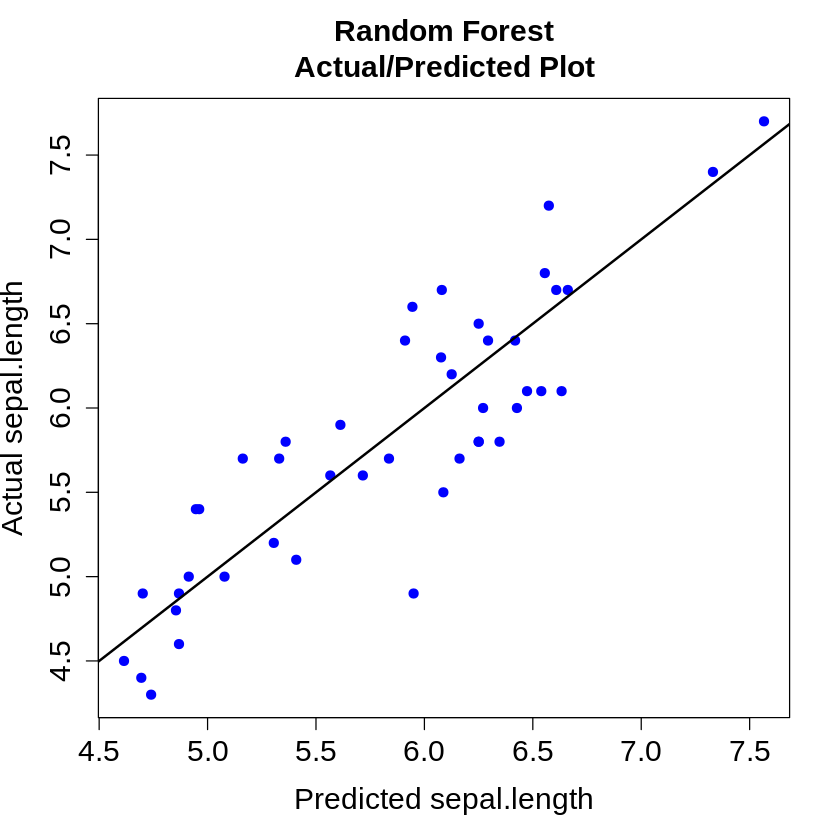

In [10]:
#Produce the predicted vs actual plot
plot.pred.rfReg <- function(results){

  prediction <- results$test_prediction
  test_data <- results$test_data
  dep_var <- results$dep_var
  
  #Generate plot
  plot(x=prediction, y=test_data[,dep_var], xlab=paste0("Predicted ", dep_var), ylab=paste0("Actual ", dep_var), main="Random Forest\nActual/Predicted Plot", col="blue", pch=19, cex.lab=1.5, cex.main=1.5, cex.axis=1.5)
  abline(a=0,b=1, lwd = 2)
}

plot.pred.rfReg(results)

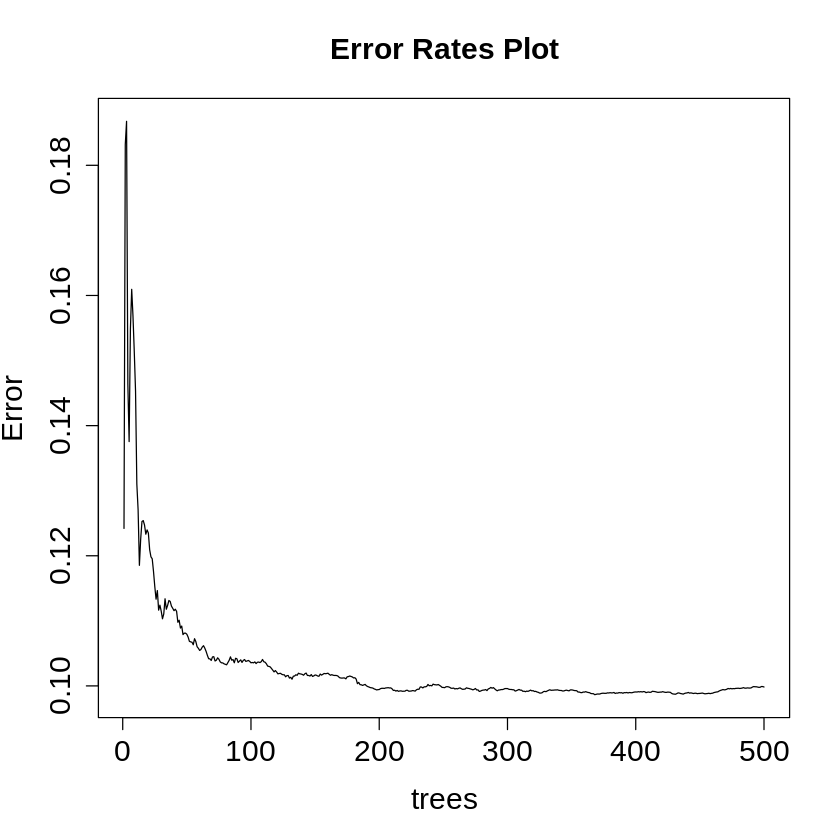

In [11]:
#Produce the error rates plot
plot.err.rfReg <- function(results){

  model <- results$model

  #Generate plot
  plot(model, main="Error Rates Plot", cex.lab=1.5, cex.main=1.5, cex.axis=1.5)
}

plot.err.rfReg(results) 